# USGS Streamflow Acquisition

In [1]:
import urllib.parse
import urllib.request
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
#importing libraries

In [3]:
station_id = input("What is the station ID?\t")
start_date = input("Start date (YYYY-MM-DD):\t")
end_date = input("End date (YYYY-MM-DD):\t")
folder = os.getcwd()
#getting user input to determine station id

What is the station ID?	 06351200
Start date (YYYY-MM-DD):	 2000-01-01
End date (YYYY-MM-DD):	 2024-12-31


In [4]:
section1 = "https://nwis.waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no="
section2 = "&legacy=&referred_module=sw&period=&begin_date="
section3 = "&end_date="
link = (section1 + station_id + section2 + start_date + section3 + end_date)
print("Link: ",link)
#getting link to USGS streamflow data

Link:  https://nwis.waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no=06351200&legacy=&referred_module=sw&period=&begin_date=2000-01-01&end_date=2024-12-31


In [5]:
USGS_page = urllib.request.urlopen(link)
downloaded_data = USGS_page.read()
#reading the link

In [6]:
type(downloaded_data)
#determining data type

bytes

In [7]:
str_data = downloaded_data.decode()
type(str_data)
#str_data to see what data looks like
#converting to string

str

In [8]:
f_str_data = str_data.split("\n")
#f_str_data
#reformatting into lines with split

In [9]:
station_name = ""
for line in range(len(f_str_data)):
    if f_str_data[line].startswith("#    USGS"):
        station_name=f_str_data[line][3:]
    #print(station_name)
#double-checking station name

In [10]:
date_flow = ""

for line in range(len(f_str_data)):
    if f_str_data[line].startswith("USGS"):
        data = f_str_data[line][14:]
        columns = data.split('\t')
        rows = ','.join([columns[0],(columns[1])])
        date_flow += rows + '\n'
date_flow = date_flow.encode()

with open(folder+'/USGS_Data_for_' + station_id  + '.txt', 'wb') as text:
        text.write(date_flow)
#formatting data into rows and columns

In [11]:
filename = folder+'/USGS_Data_for_' + station_id  + '.txt'
columns = ['Date','Discharge (cfs)']
df = pd.read_csv(filename,header=None,names=columns,parse_dates=[0])
df=df.set_index(['Date'])
df['Discharge (cfs)']=pd.to_numeric(df['Discharge (cfs)'], errors='coerce')
df.head()
#naming rows and columns, formatting file
#df.tail() shows the end date

,Discharge (cfs)
Date,
2001-03-01,16.0
2001-03-02,18.0
2001-03-03,22.0
2001-03-04,24.0
2001-03-05,29.0


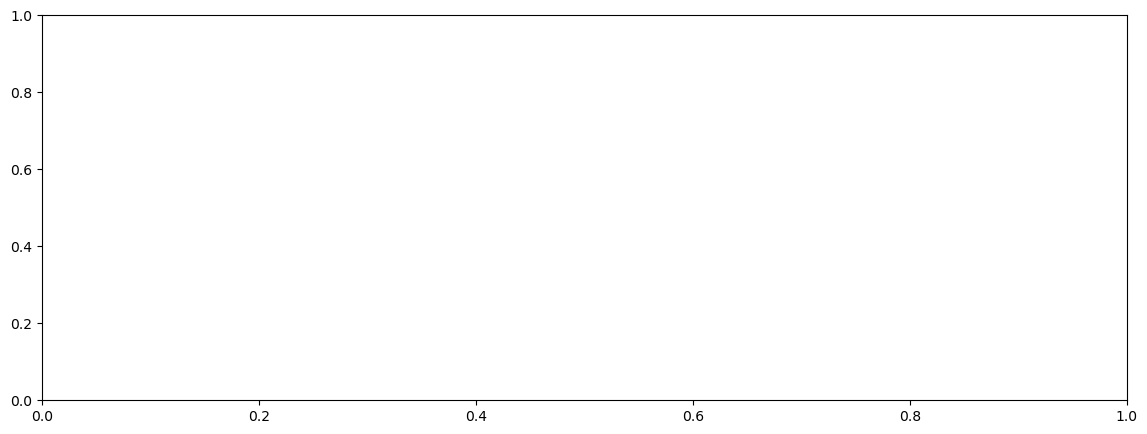

In [12]:
fig, ax = plt.subplots(figsize=(14, 5))
#plotting the axes

In [13]:
df.plot(ax=ax, title= station_name, xlabel="Time", ylabel="Discharge (cfs)");
#adding the data

In [14]:
fig.savefig("UpperCannonball_" + station_id + ".png", dpi=300, bbox_inches='tight')
#saving the figure

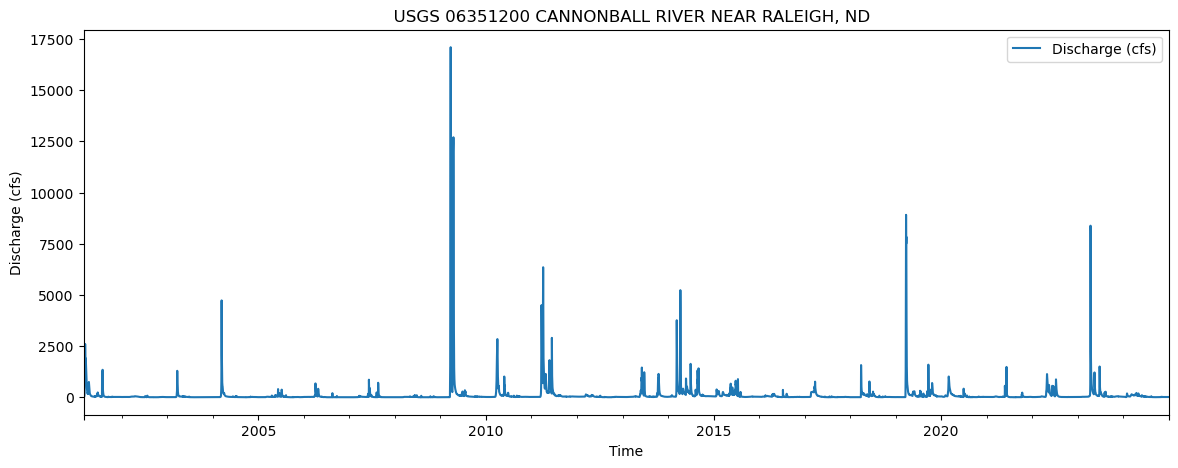

In [15]:
display(fig)
#displaying figure to check for errors